In [1]:
import numpy as np
import pandas as pd
from astropy.io import fits
import glob
import matplotlib.pyplot as plt 

In [4]:
GRID_X, GRID_Y = 100, 100

data = []

fits_files = glob.glob("/media/bekah/BekahA/background_test/pics_and_photonlists/nuv_nobkg/e*_NUV_threshold_11_14_bkgsub.fits")

for file in fits_files:
    with fits.open(file) as hdul:
        count_image = hdul[1].data
        segmentation_map = hdul[2].data
        threshold_image = hdul[3].data
        header = hdul[0].header
        exposure_time = header.get("EXPTIME", np.nan)
        eclipse = header.get("ECLIPSE", np.nan)

        height, width = count_image.shape
        cell_height = height // GRID_Y
        cell_width = width // GRID_X

        for i in range(GRID_Y):
            for j in range(GRID_X):
                y_start, y_end = i * cell_height, (i + 1) * cell_height
                x_start, x_end = j * cell_width, (j + 1) * cell_width
                
                count_region = count_image[y_start:y_end, x_start:x_end]
                segmentation_region = segmentation_map[y_start:y_end, x_start:x_end]
                threshold_region = threshold_image[y_start:y_end, x_start:x_end]
                
                source_count = np.sum(segmentation_region > 0)
                
                avg_count_rate = np.mean(count_region)
                avg_threshold = np.mean(threshold_region)
                med_count_rate = np.median(count_region)
                med_threshold = np.median(threshold_region)
                
                data.append({
                    "eclipse": eclipse,  
                    "cell_x": j,
                    "cell_y": i,
                    "source_count": source_count,
                    "avg_count_rate": avg_count_rate,
                    "avg_threshold": avg_threshold,
                    "med_threshold": med_threshold,
                    "med_count_rate": med_count_rate,
                    "exposure_time": exposure_time
                })

df = pd.DataFrame(data)


In [5]:
df_filtered = df[df["source_count"] > 0]


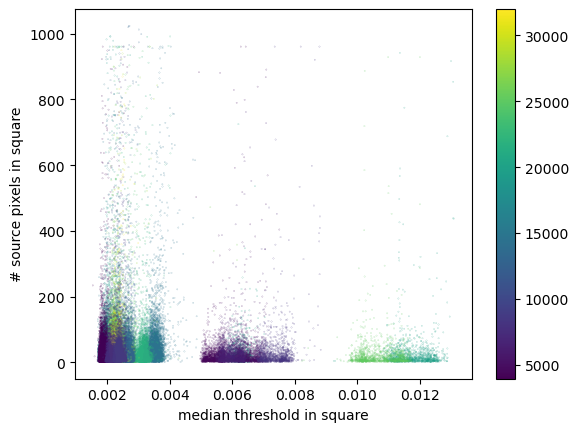

In [7]:
plt.scatter(df_filtered['med_threshold'],df_filtered['source_count'],s=.01, c=df_filtered['eclipse'])
plt.xlabel("median threshold in square")
plt.ylabel("# source pixels in square")
plt.colorbar()

In [ ]:
plt.scatter(df['med_threshold'],df['source_count'],s=.0001)
plt.xlabel("median threshold in square")
plt.ylabel("# source pixels in square")


In [ ]:
plt.scatter(df_filtered['exposure_time'],df_filtered['source_count'],s=.001)